<a href="https://colab.research.google.com/github/WendyOira/NaiveBayes-KNN/blob/main/k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Defining the question**

a) Specifying the question

Build a model that determines whether or not passengers survived 

Models to use:


1.   the k-nearest neighbors algorithm (k-NN) 

##**Defining the Metric for Success**
Because we are creating a classification model, our metric of success will be model accuracy score. We will set the minumum accuracy score at 90%.

##**Understanding the Context**

The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time)[a] on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.

The information above has been cited from https://en.wikipedia.org/wiki/Sinking_of_the_Titanic



##**Recording the experimental design**

Define the question, the metric for success, the context, experimental design taken.

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate recording your observations.

Performing k-NN classification

Conclusion

Recommendations

## **Dataset glossary**

PassengerId- A unique ID to each Passenger

Survived- A boolean variable; 1 - Survived, 0 - Dead

Pclass-	Ticket Class; 1 - 1st, 2 - 2nd, 3 - 3rd class

Name-	Passenger Name

Sex-	Sex of Passenger

Age-	Age in Years

SibSp-	Number of Siblings / Spouses Aboard

Parch-	Number of parents / children aboard the titanic

Ticket-	Ticket number

Fare-	Passenger Fare

Cabin-	Cabin number

Embarked-	Port of Embarkation; C - Cherbourg, Q - Queenstown, S - Southampton

In [ ]:
# Start by importing the basic relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Train Dataset

In [ ]:
# Load the Train dataset
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')

In [ ]:
# Checking the column names in the train dataset
print('The column names in the train dataset are :')
train.columns

The column names in the train dataset are :


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Previewing the first five rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the last five rows
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Determining the no. of records in our dataset
train.shape

(891, 12)

We have 891 records and 12 variables

In [ ]:
# Checking whether each column has the appropriate datatype
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Our variables are a combination of integer, object and float datatypes

In [ ]:
# Checking the dataframe's statistical information
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to the above information we can see that Age is the only numerical variable with missing values 

In [ ]:
# Checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have missing values in Age, Cabin and Embarked variables

In [ ]:
# Check for duplicate values 
train.duplicated().sum()

0

We have no duplicate values 

## Test Dataset

In [ ]:
# We will proceed to loading our test dataset 
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

In [ ]:
# Checking the column names in the test dataset
print('The column names in the test dataset are :', test.columns )

The column names in the test dataset are : Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Previewing the first five rows
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the last five rows
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Determining the no. of records in our dataset
test.shape

(418, 11)

We have 418 records and 11 variables

In [ ]:
# Checking whether each column has the appropriate datatype
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Our variables in the test dataframe are also a combination of integer, object and float datatypes

In [ ]:
# Checking the dataframe's statistical information
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The age variable also has missing values in this dataframe

In [ ]:
# Checking for null values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are missing values in the age and cabin variables

In [ ]:
# Check for duplicate values 
test.duplicated().sum()

0

There are no duplicate values 

## Data Cleaning

## Train Dataset

In [ ]:
# Dealing with missing values 
# Let's confirm the missing values again
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Identify the total number of missing values in our dataframe
train.isnull().sum().sum()

866

We have 866 missing values in the train dataset

In [ ]:
# Let's find the percentage of missing values in each column in our dataframe 
percentage = train.isnull().sum()*100/len(train)
percentage.sort_values(ascending = False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

Over 50% of the values in the cabin variable are missing 

In [ ]:
# We will drop Cabin column because it contains over 50% of missing values
train_clean = train.drop('Cabin', axis = 1)

In [ ]:
# Confirm the changes made
train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


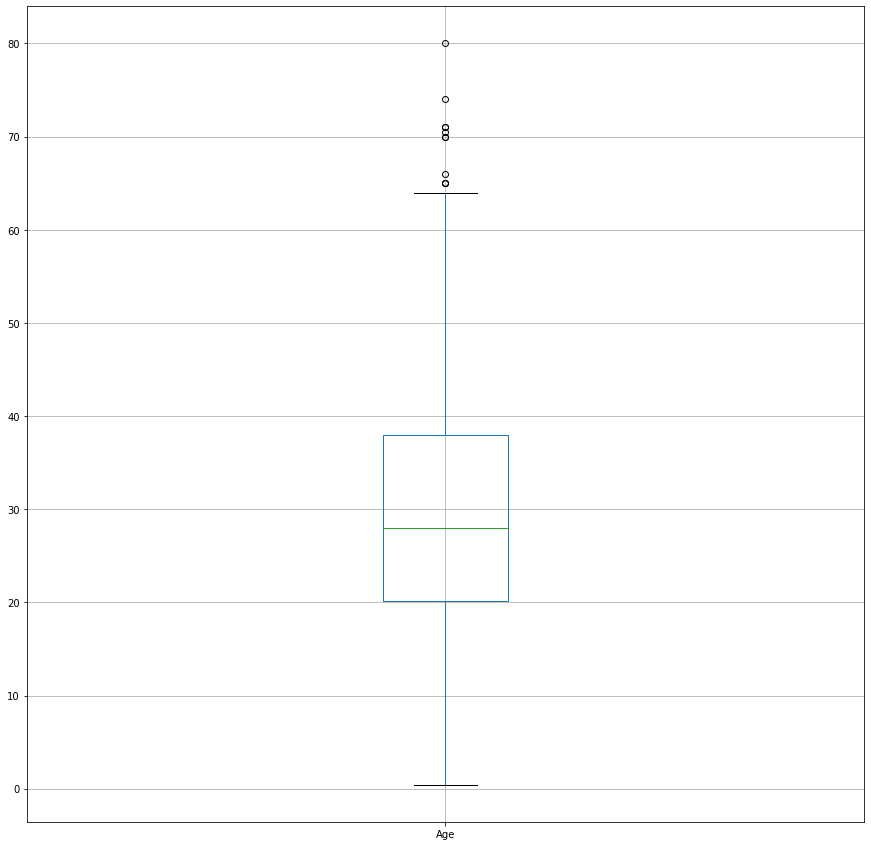

In [ ]:
# We will check for outliers in our numerical data in order to determine how we will fill 
# null values in the age column
train_clean.boxplot(column = 'Age', figsize = (15,15))
plt.show()

For symmetric data distribution, one can use the mean value for imputing missing values and for non symetric data distribution one can use median.This is because outliers data points will have a significant impact on the mean

In [ ]:
# We will fill the missing values in the Age column with the median
train_clean['Age'].fillna(train_clean['Age'].median(), inplace = True)

In [ ]:
# We will fill the missing values in sex variable with the mode 
train_clean['Embarked'].fillna(train_clean['Embarked'].mode()[0], inplace = True)

In [ ]:
# Confirm the changes made 
train_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We successfully dealt with the missing values 

In [ ]:
# Check the shape of our dataframe after all the changes made
train_clean.shape

(891, 11)

We now have 891 records and 11 variables

In [ ]:
# Check for unique values in our dataframe inorder to identify any annomalies
columns = train_clean.columns
for i in columns:
  print('Unique values in', i , 'are :')
  print(train_clean[i].unique())
  print('                                                                           ')
  print('***************************************************************************')

Unique values in PassengerId are :
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238

Some Notes Regarding Dataset

Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

SibSp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

*Source: [Kaggle's - Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)*

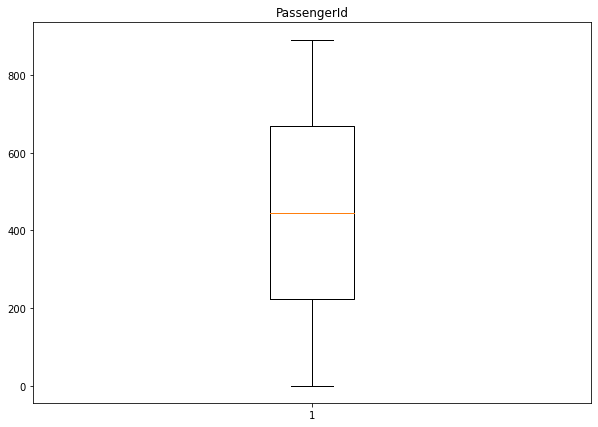

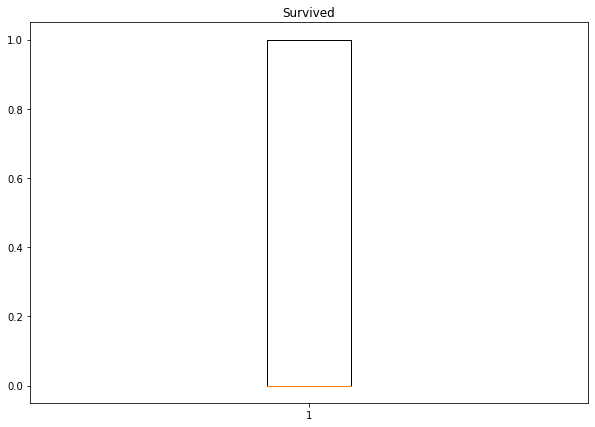

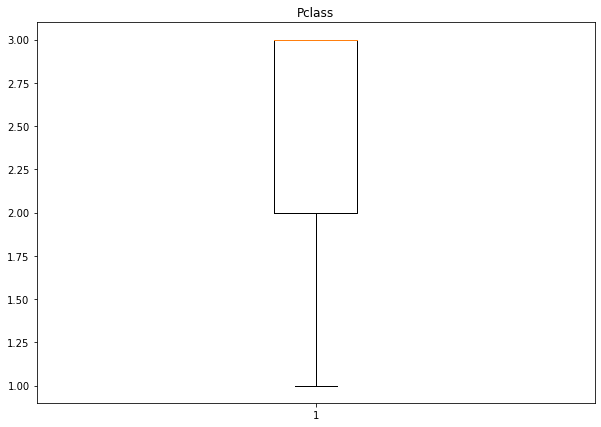

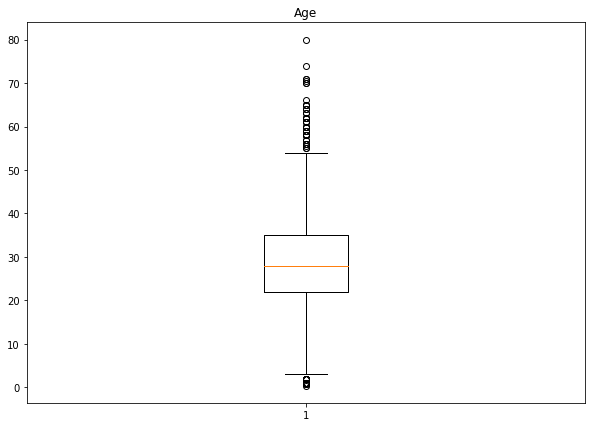

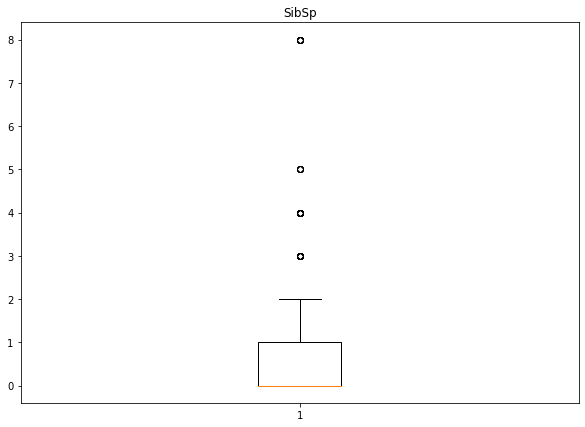

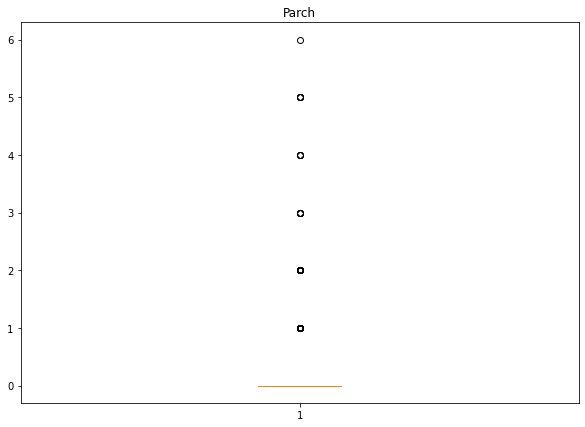

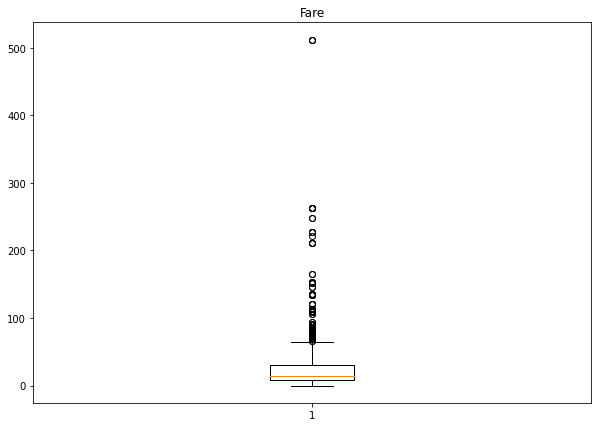

In [ ]:
# We will check for outliers in our numerical variables
num = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
for i in num:
  fig = plt.figure(figsize = (10,7))
  plt.boxplot(train_clean[i])
  plt.title(i)
  plt.show()

We have presence of outliers in the Age, SibSp, Parch and fare variables

## Test Dataset

In [ ]:
# Dealing with missing values 
# Let's confirm the missing values again
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Identify the total number of missing values in our dataframe
test.isnull().sum().sum()

414

We have a total of 414 missing variables in the test dataset

In [ ]:
# Let's find the percentage of missing values in each column in our dataframe 
percentage_test = test.isnull().sum()*100/len(test)
percentage_test.sort_values(ascending = False)

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

In [ ]:
# We will drop Cabin column because it contains over 50% of missing values
test_clean = test.drop('Cabin', axis = 1)

In [ ]:
# Confirm changes made
test_clean.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


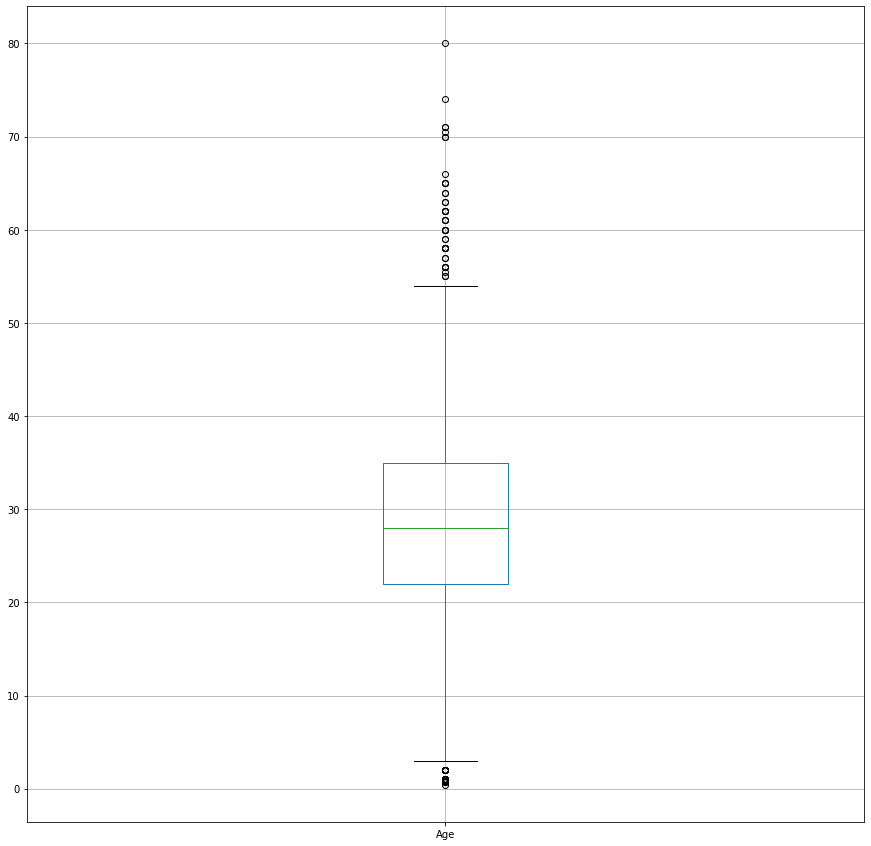

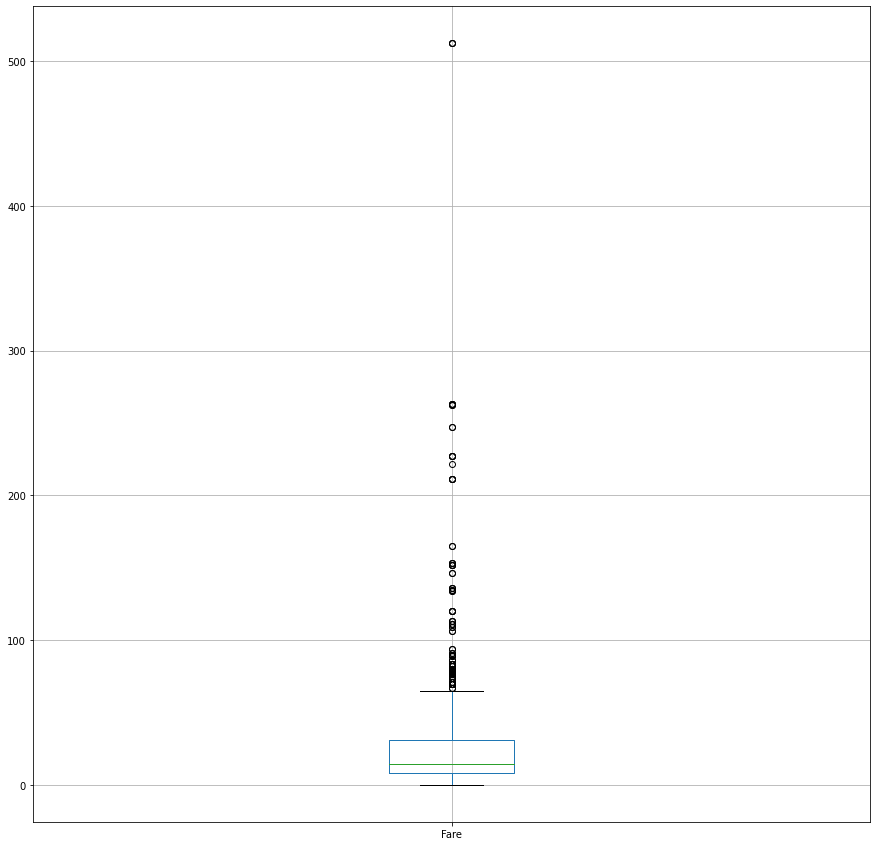

In [ ]:
# We will check for outliers in our numerical data in order to determine how we will fill 
# null values in the age and fare columns
out = ['Age','Fare']
for i in out:
  train_clean.boxplot(column = i , figsize = (15,15))
  plt.show()

For symmetric data distribution, one can use the mean value for imputing missing values and for non symetric data distribution one can use median.This is because outliers data points will have a significant impact on the mean

In [ ]:
# We will fill the missing values in the Age and fare column with the median
test_clean['Age'].fillna(test_clean['Age'].median(), inplace = True)
test_clean['Fare'].fillna(test_clean['Fare'].median(), inplace = True)

In [ ]:
# Confirm the changes made 
test_clean.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have successfully dealt with the missing values 

In [ ]:
# Check the shape of our dataframe after all the changes made
test_clean.shape

(418, 10)

We now have 418 records and 10 variables

In [ ]:
# Check for unique values in our dataframe inorder to identify any annomalies
columns_test = test_clean.columns
for i in columns_test:
  print('Unique values in', i , 'are :')
  print(test_clean[i].unique())
  print('                                                                           ')
  print('***************************************************************************')

Unique values in PassengerId are :
[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1

In [ ]:
test_clean.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

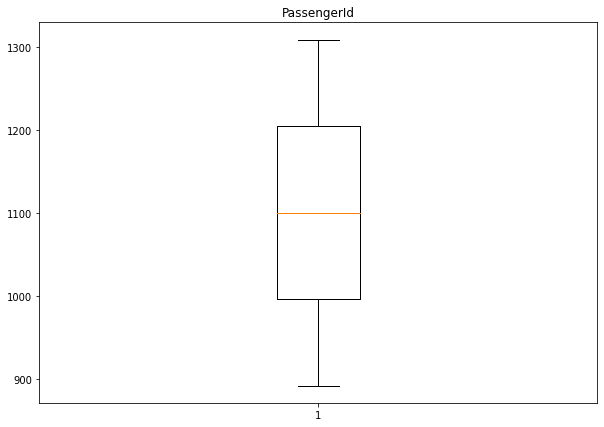

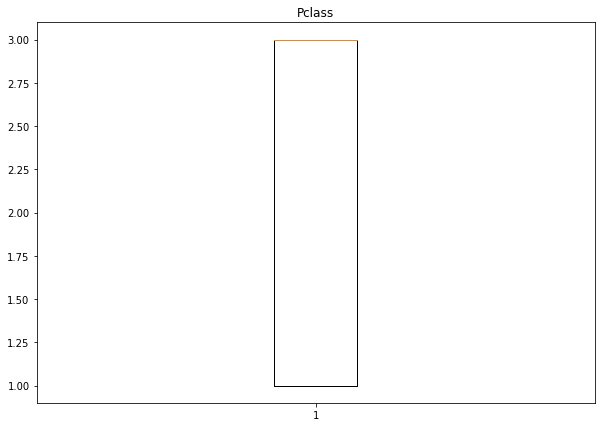

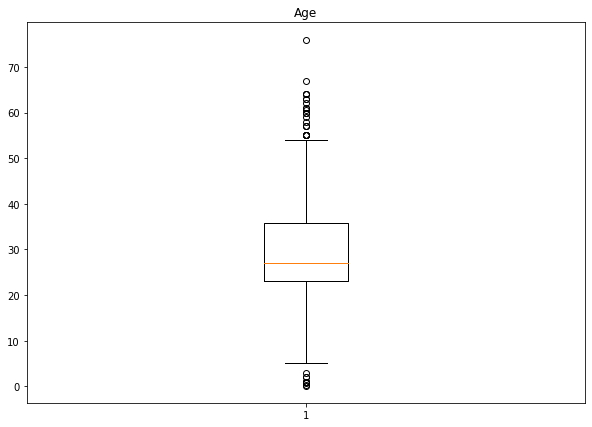

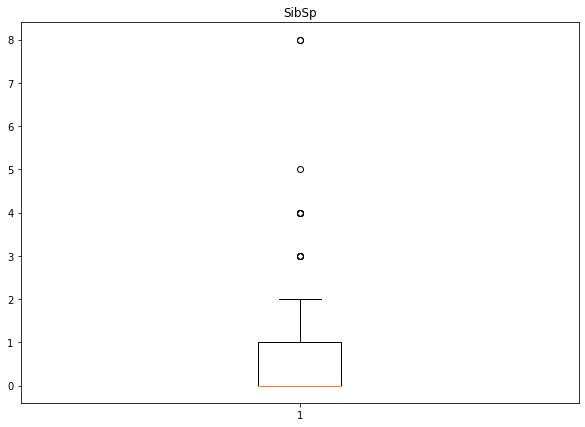

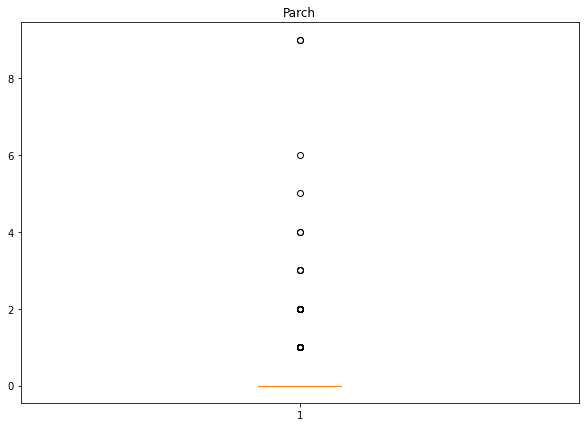

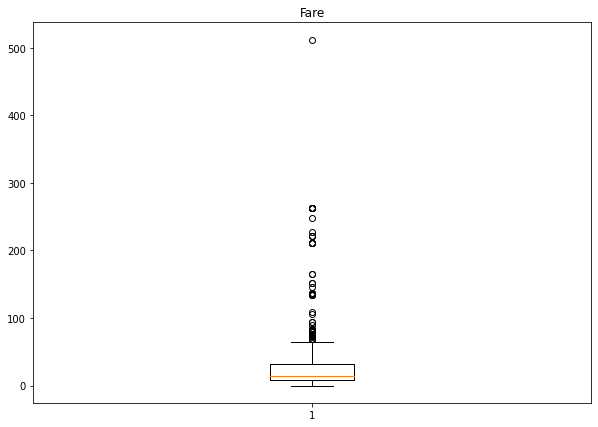

In [ ]:
# We will check for outliers in our numerical variables
numerical = ['PassengerId', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
for i in numerical:
  fig = plt.figure(figsize = (10,7))
  plt.boxplot(test_clean[i])
  plt.title(i)
  plt.show()

There is presence of outliers in Age, SibSp, Parch and Fare variables 

## Exploratory Data Analysis

## Univariate Analysis

## Train Dataset

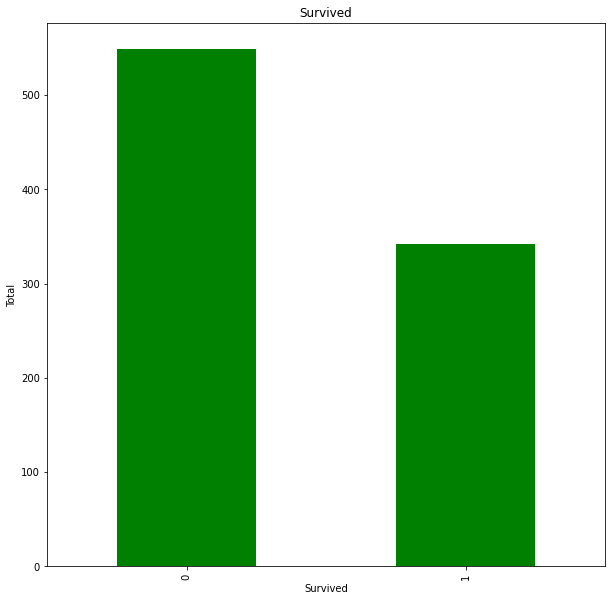

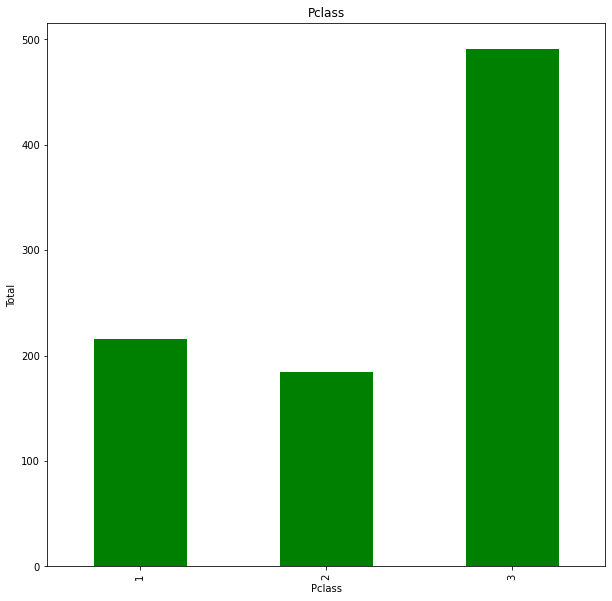

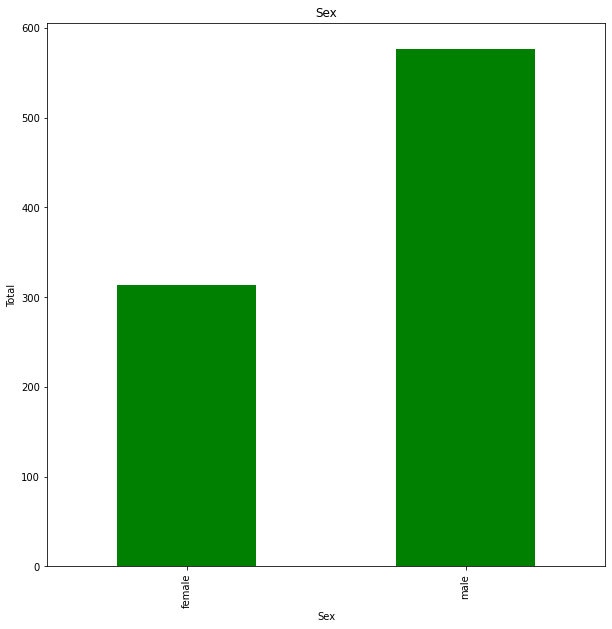

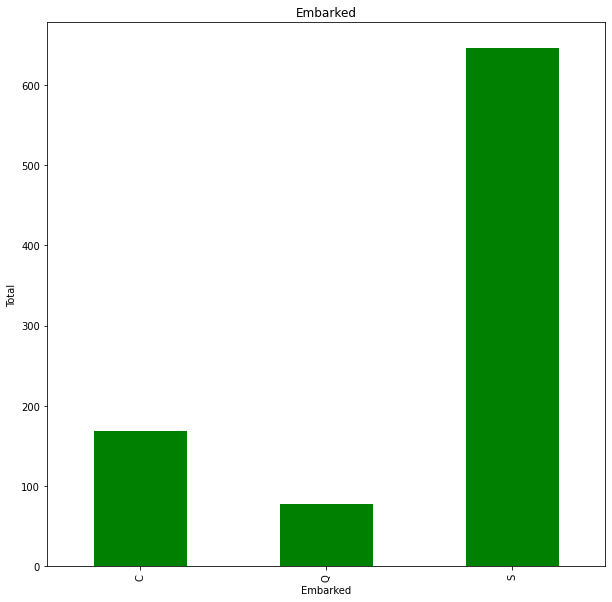

In [ ]:
# Bar charts on Surived, Pclass, Sex and Embarked
bar = ['Survived', 'Pclass', 'Sex', 'Embarked']
for i in bar:
  plt.figure(figsize = (10,10))
  train_clean.groupby(i).size().plot(kind='bar', color= 'green')
  plt.title(i)
  plt.ylabel('Total')
  plt.xlabel(i)
  plt.show()

Most passengers:


1.   did not survive
2.   were in third class
3.   were male
4.   embarked from port of Southhamptom



In [ ]:
# Frequency tables
frequency  = ['Age', 'SibSp','Parch', 'Fare']
for i in frequency:
  print('Frequency table of', i)
  count = train_clean[i].value_counts().head()
  print(count)
  print('**********************************************************')
  print('                                                          ')


Frequency table of Age
28.0    202
24.0     30
22.0     27
18.0     26
19.0     25
Name: Age, dtype: int64
**********************************************************
                                                          
Frequency table of SibSp
0    608
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64
**********************************************************
                                                          
Frequency table of Parch
0    678
1    118
2     80
5      5
3      5
Name: Parch, dtype: int64
**********************************************************
                                                          
Frequency table of Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64
**********************************************************
                                                          


Most passengers:


1.   were 28.0 years old
2.   did not have family travelling with them
3.   paid 8.0500 as fare



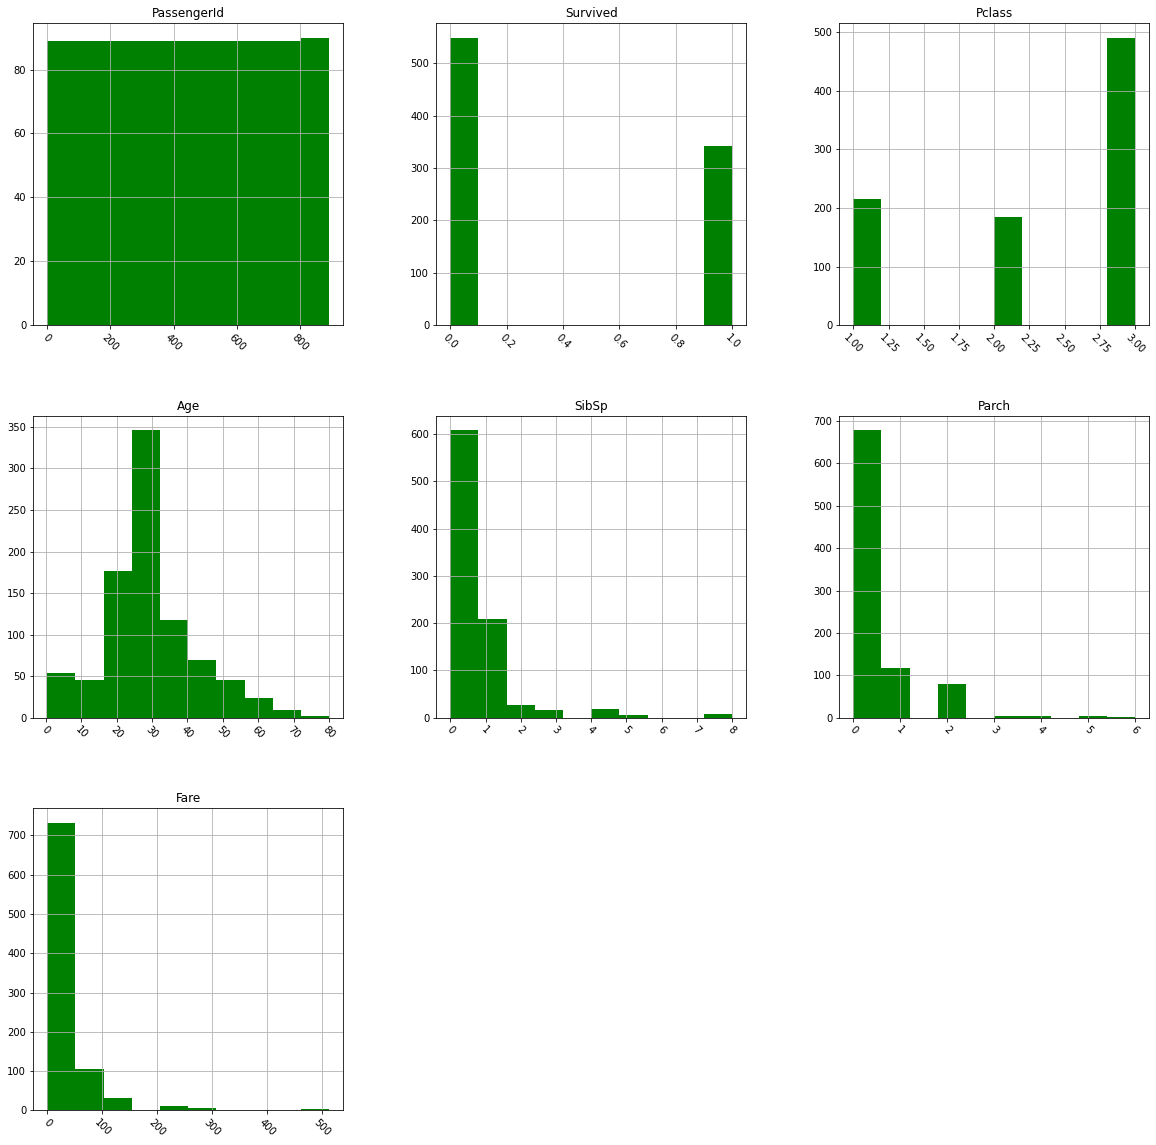

In [ ]:
# Histograms of our dataframe
train_clean.hist(figsize=(20,20), xrot= -45, color = 'green')
plt.show()

In [ ]:
# Checking the mean, standard deviation and quantiles of our dataframe
train_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking the median, mode, varaince, skewness and kurtosis of our dataframe
cols = ['Survived', 'Pclass', 'Age', 'SibSp','Parch','Fare']
for i in cols:
  print('The median of', i, 'is:')
  print(train_clean[i].median())
  print('The mode of', i, 'is:')
  print(train_clean[i].mode())
  print('The variance of', i, 'is:')
  print(train_clean[i].var())
  print('The skewness of', i, 'is:')
  print(train_clean[i].skew())
  print('The kurtosis of', i, 'is:')
  print(train_clean[i].kurt())
  print('                                    ')
  print('************************************')

The median of Survived is:
0.0
The mode of Survived is:
0    0
dtype: int64
The variance of Survived is:
0.2367722165474984
The skewness of Survived is:
0.4785234382949897
The kurtosis of Survived is:
-1.775004671066304
                                    
************************************
The median of Pclass is:
3.0
The mode of Pclass is:
0    3
dtype: int64
The variance of Pclass is:
0.6990151199889065
The skewness of Pclass is:
-0.6305479068752845
The kurtosis of Pclass is:
-1.2800149715782825
                                    
************************************
The median of Age is:
28.0
The mode of Age is:
0    28.0
dtype: float64
The variance of Age is:
169.51249827942328
The skewness of Age is:
0.5102446555756495
The kurtosis of Age is:
0.9938710163801736
                                    
************************************
The median of SibSp is:
0.0
The mode of SibSp is:
0    0
dtype: int64
The variance of SibSp is:
1.2160430774662894
The skewness of SibSp is:
3.69

Skeweness


1.   Survived variable is fairly symmetrical
2.   Pclass variable is moderately skewed
3.   Age variable is fairly symmetrical
4.   SibSp variable is highly skewed
5.   Parch variable is highly skewed
6.   Fare variable is highly skewed


SibSp, Parch and fare have heavier tails, an indication of presence of outliers 



## Bivariate Analysis

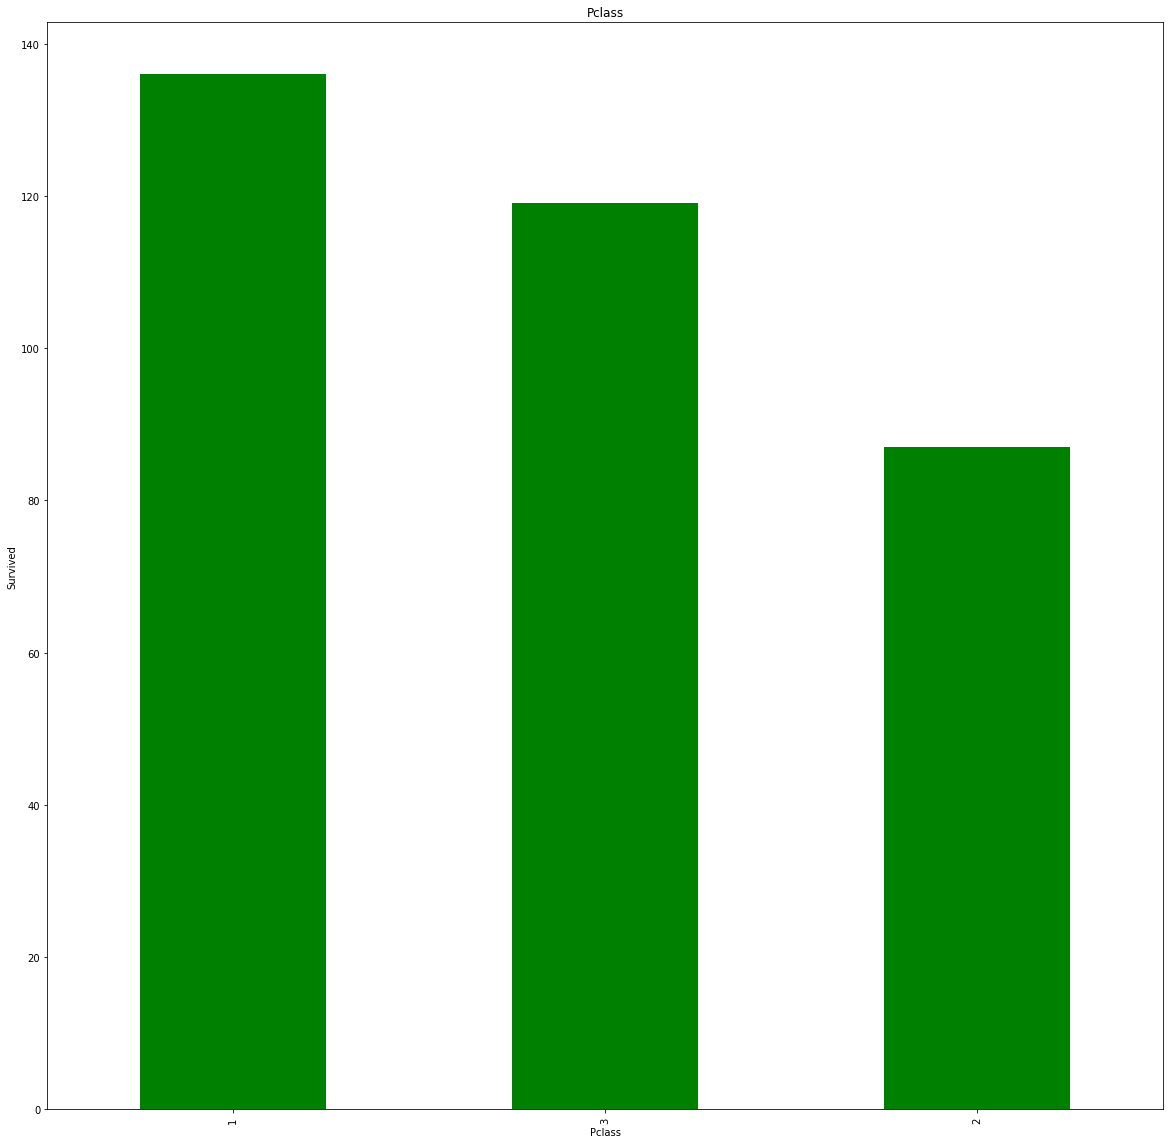

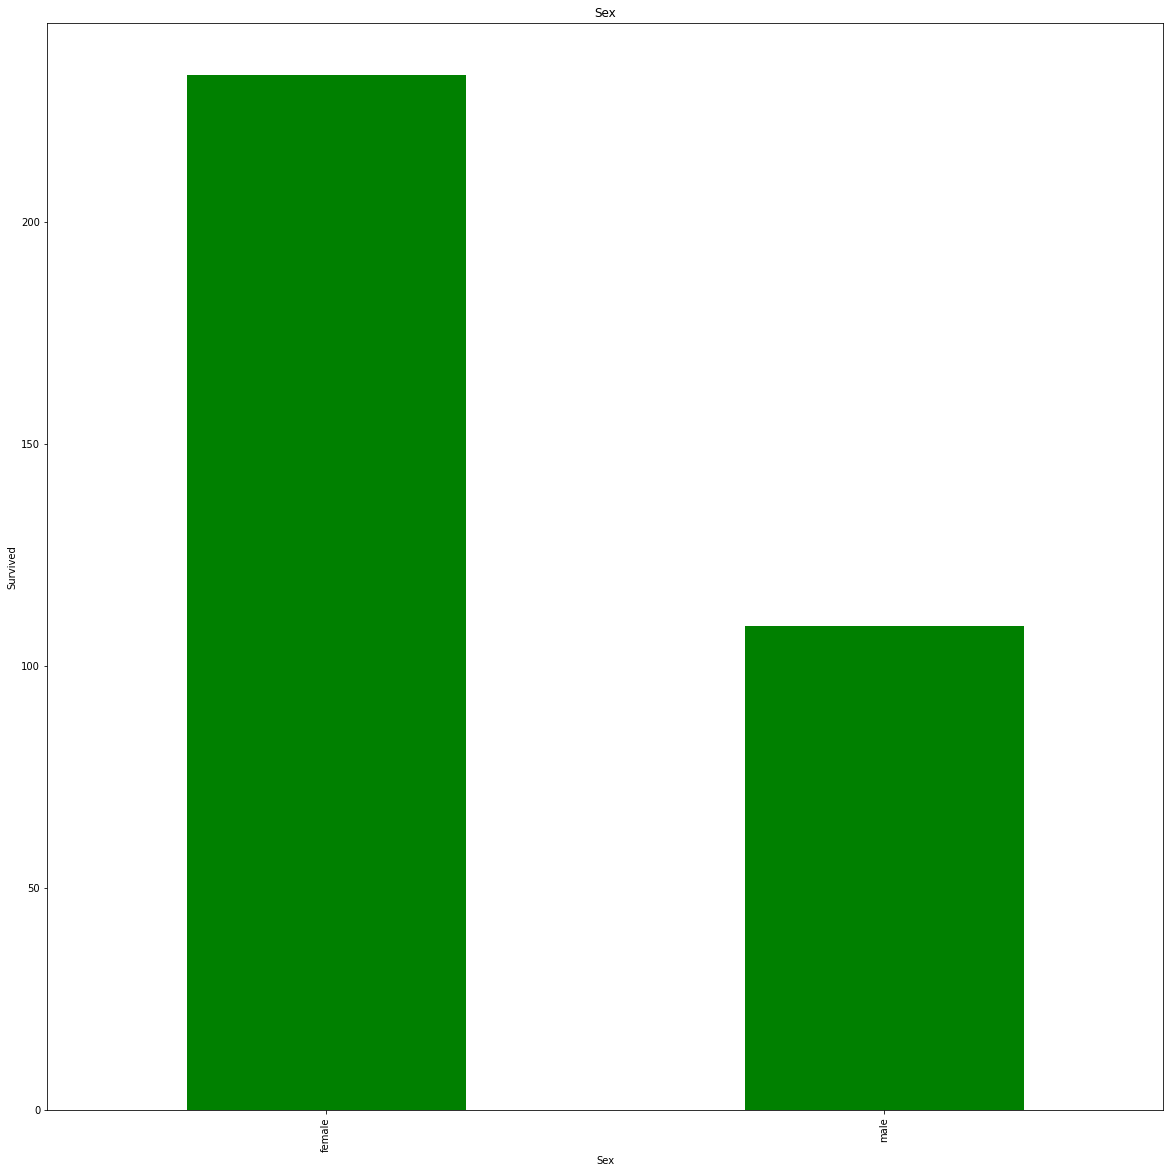

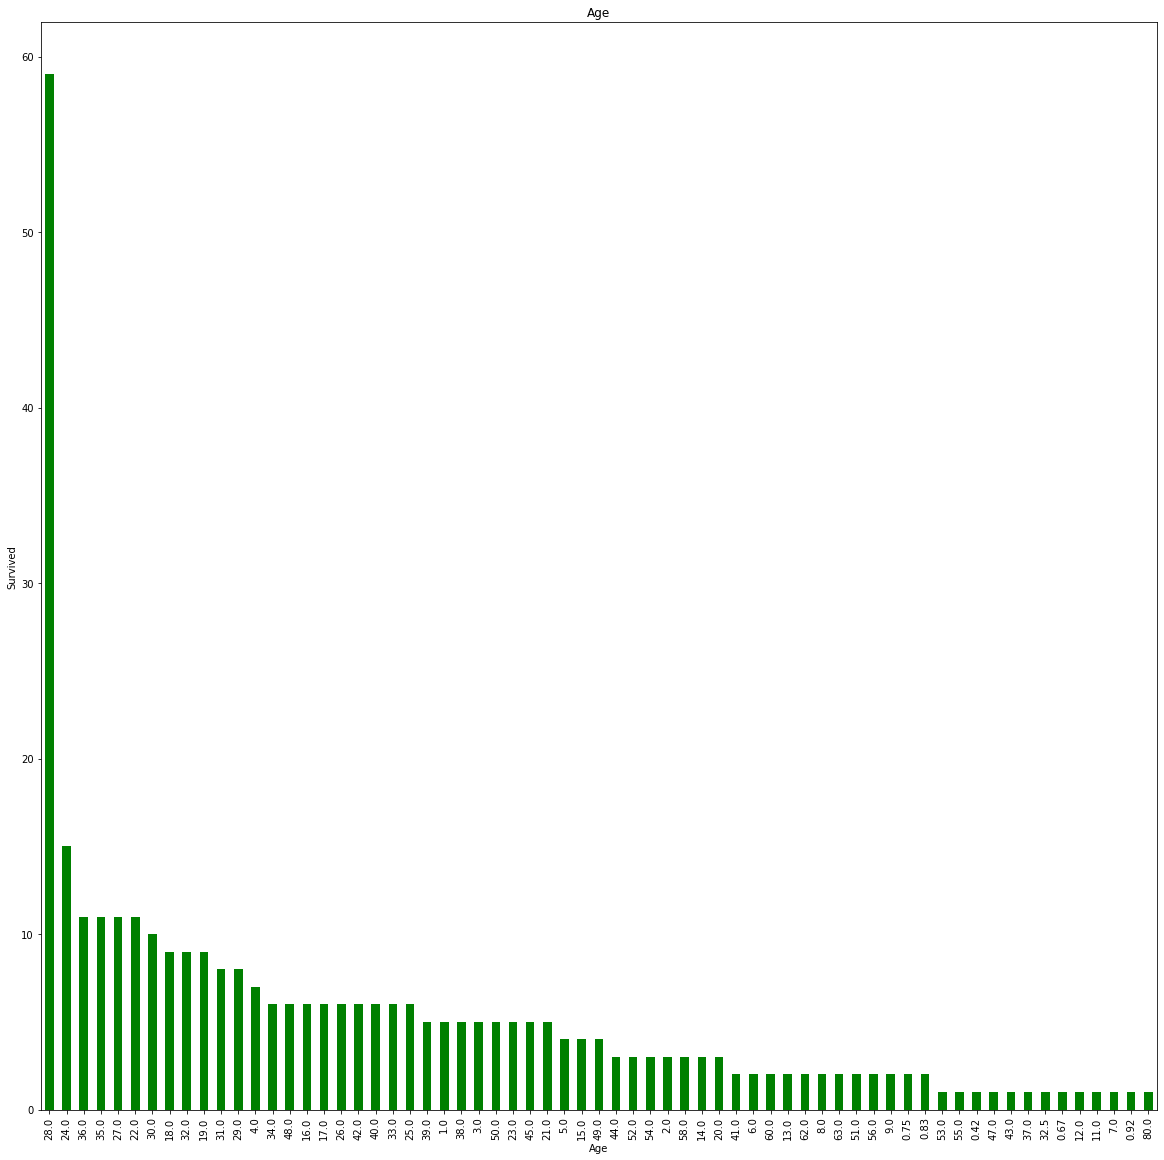

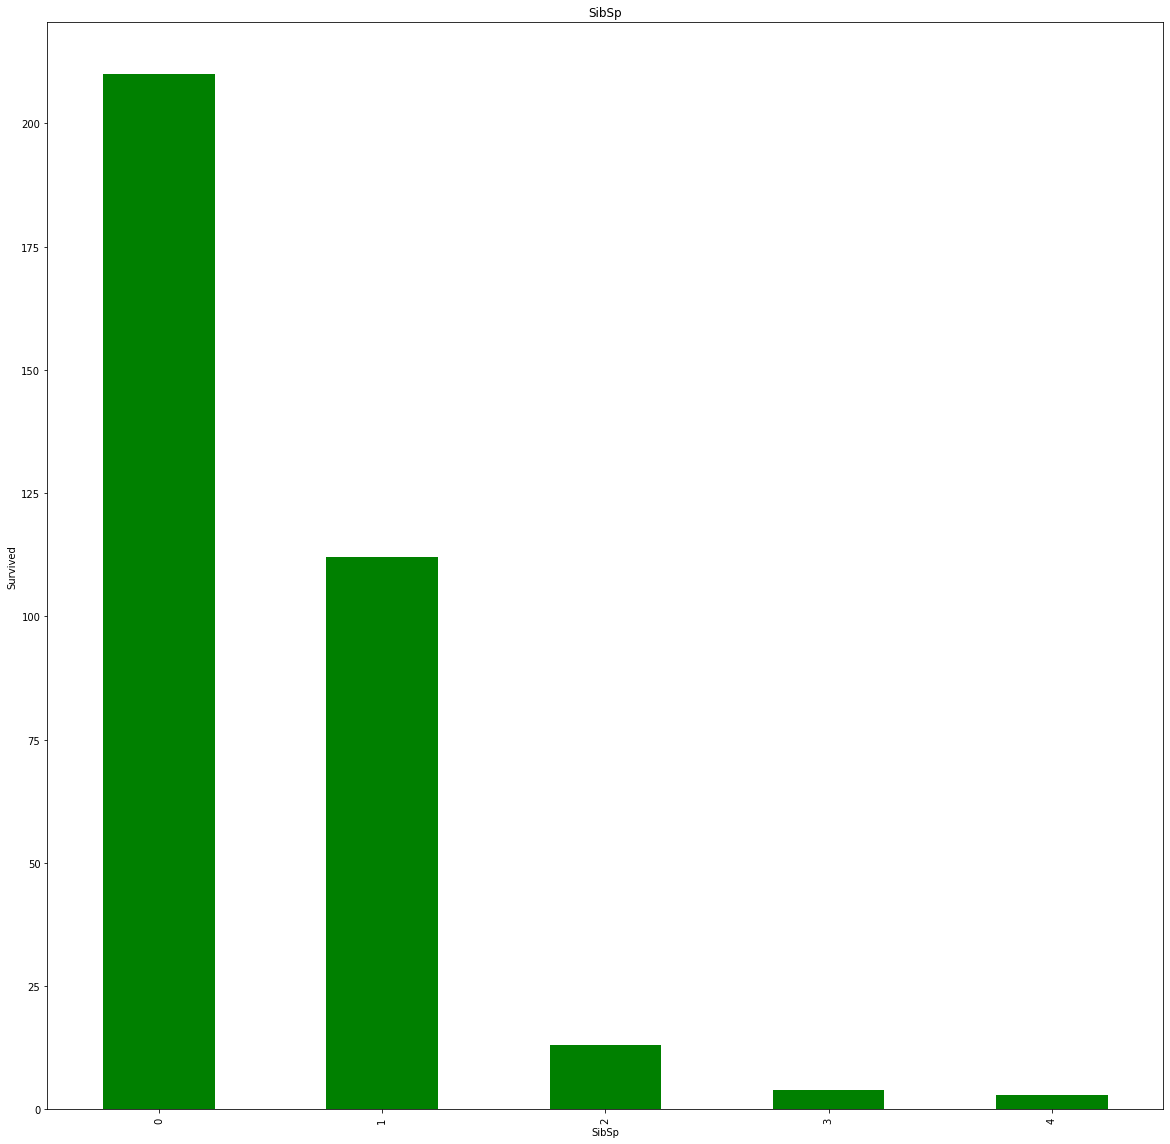

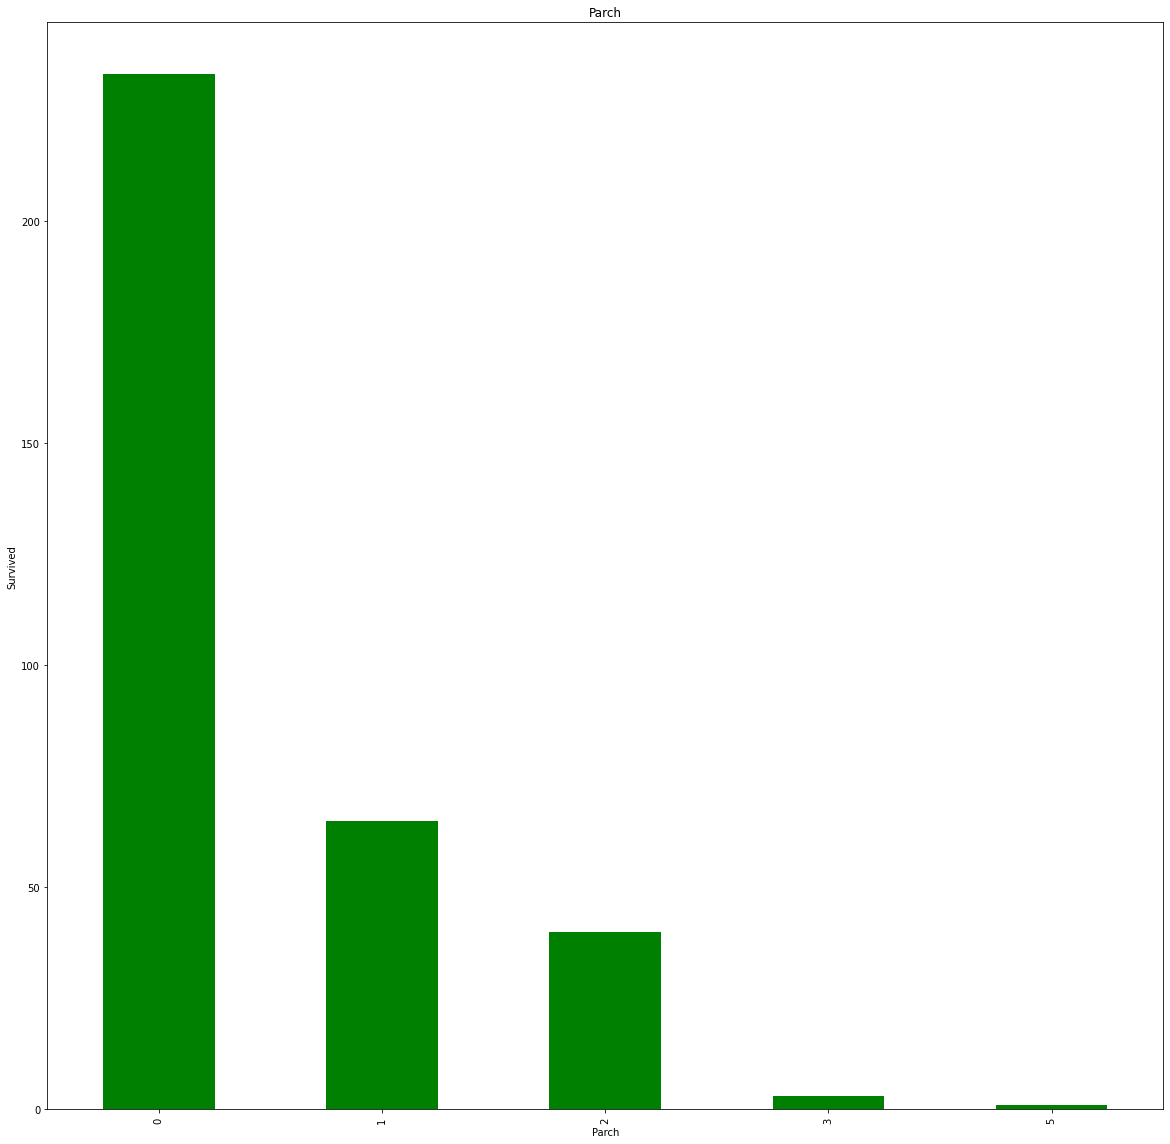

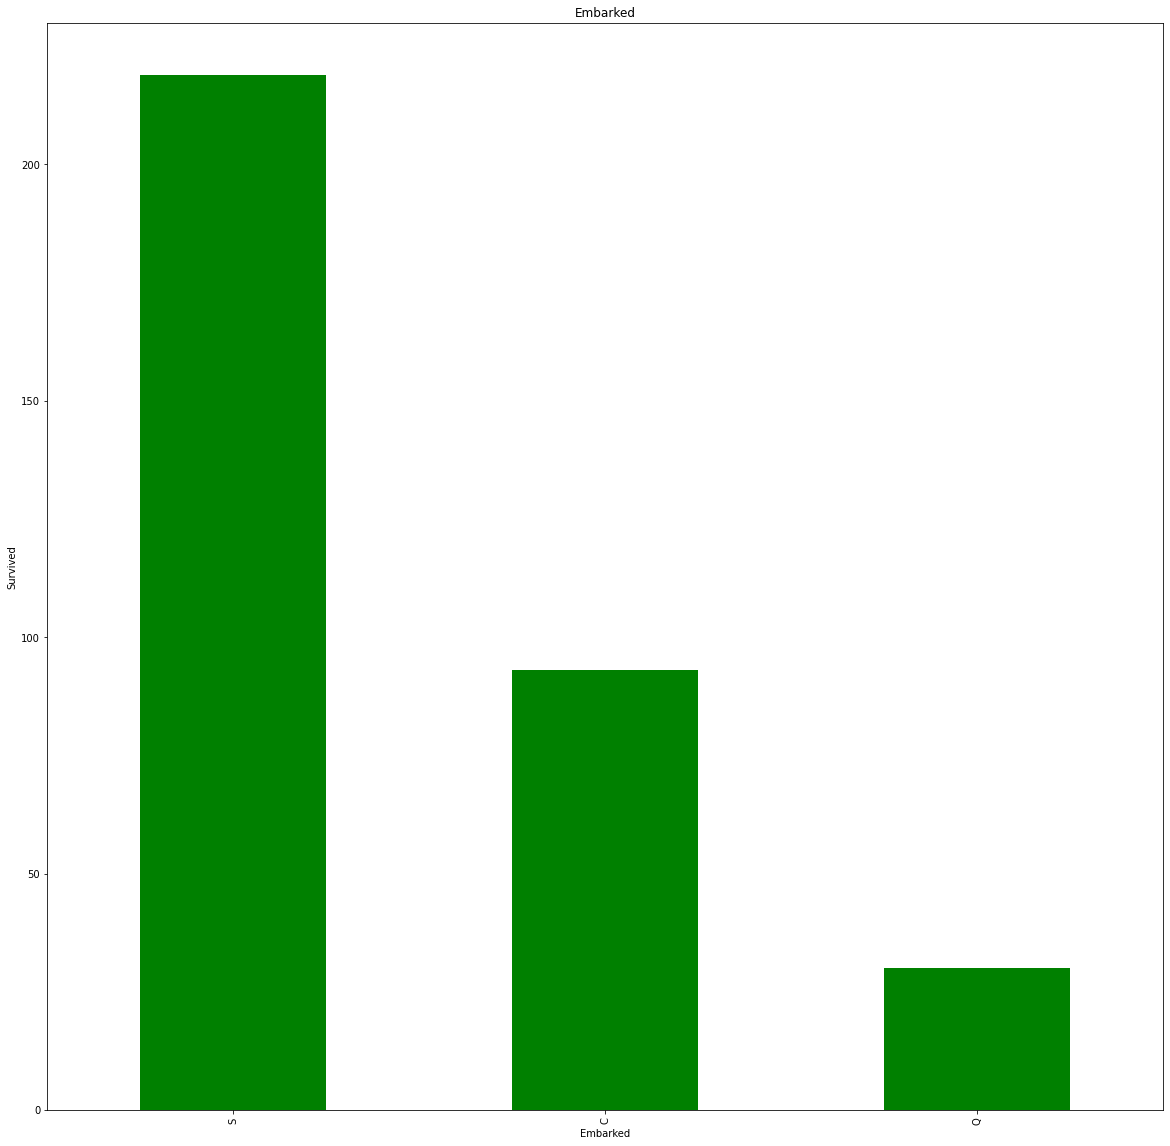

In [ ]:
# Assessing the likelihood of getting hypothyroidism depending on our variables 
assess = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Embarked']
for i in assess:
  survival = train_clean[(train_clean['Survived']==1)]
  bar= survival.groupby([i])['Survived'].size().sort_values(ascending= False)
  bar.plot(kind = 'bar', title= i, ylabel = 'Survived' , xlabel = i , figsize =(20,20) , color = 'green')
  plt.show()

Most Survivors:


*   were from first class
*   were female
*   were of the age of 28.0, 24.0, 36.0, 37.0 and 27.0
*   travelled without family
*   embarked from the port of Southampton





In [ ]:
# Asses correlation between our variables 
train_clean.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


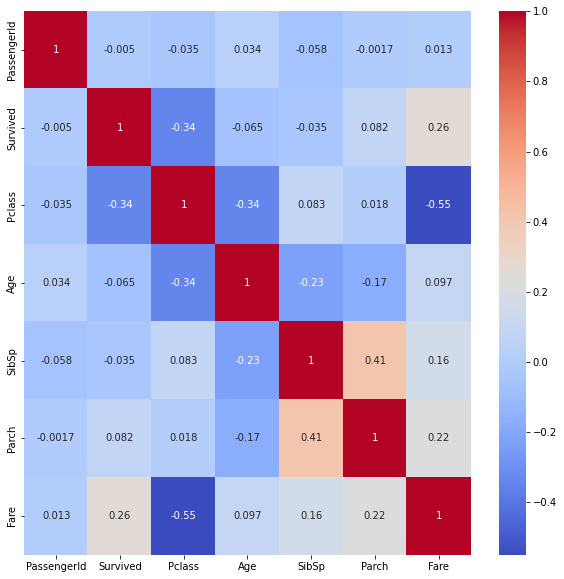

In [ ]:
# Plot a heatmap
# Visualisation to asses correlation 
fig, heat = plt.subplots(figsize = (10,10))
heat = sns.heatmap(train_clean.corr(), annot = True, cmap = 'coolwarm')

There is a weak positive correlation between SibSp and Parch

We don't have any strong negative or positive correlation in our dataset

Most of our data has no linear relationship

<Figure size 700x500 with 0 Axes>

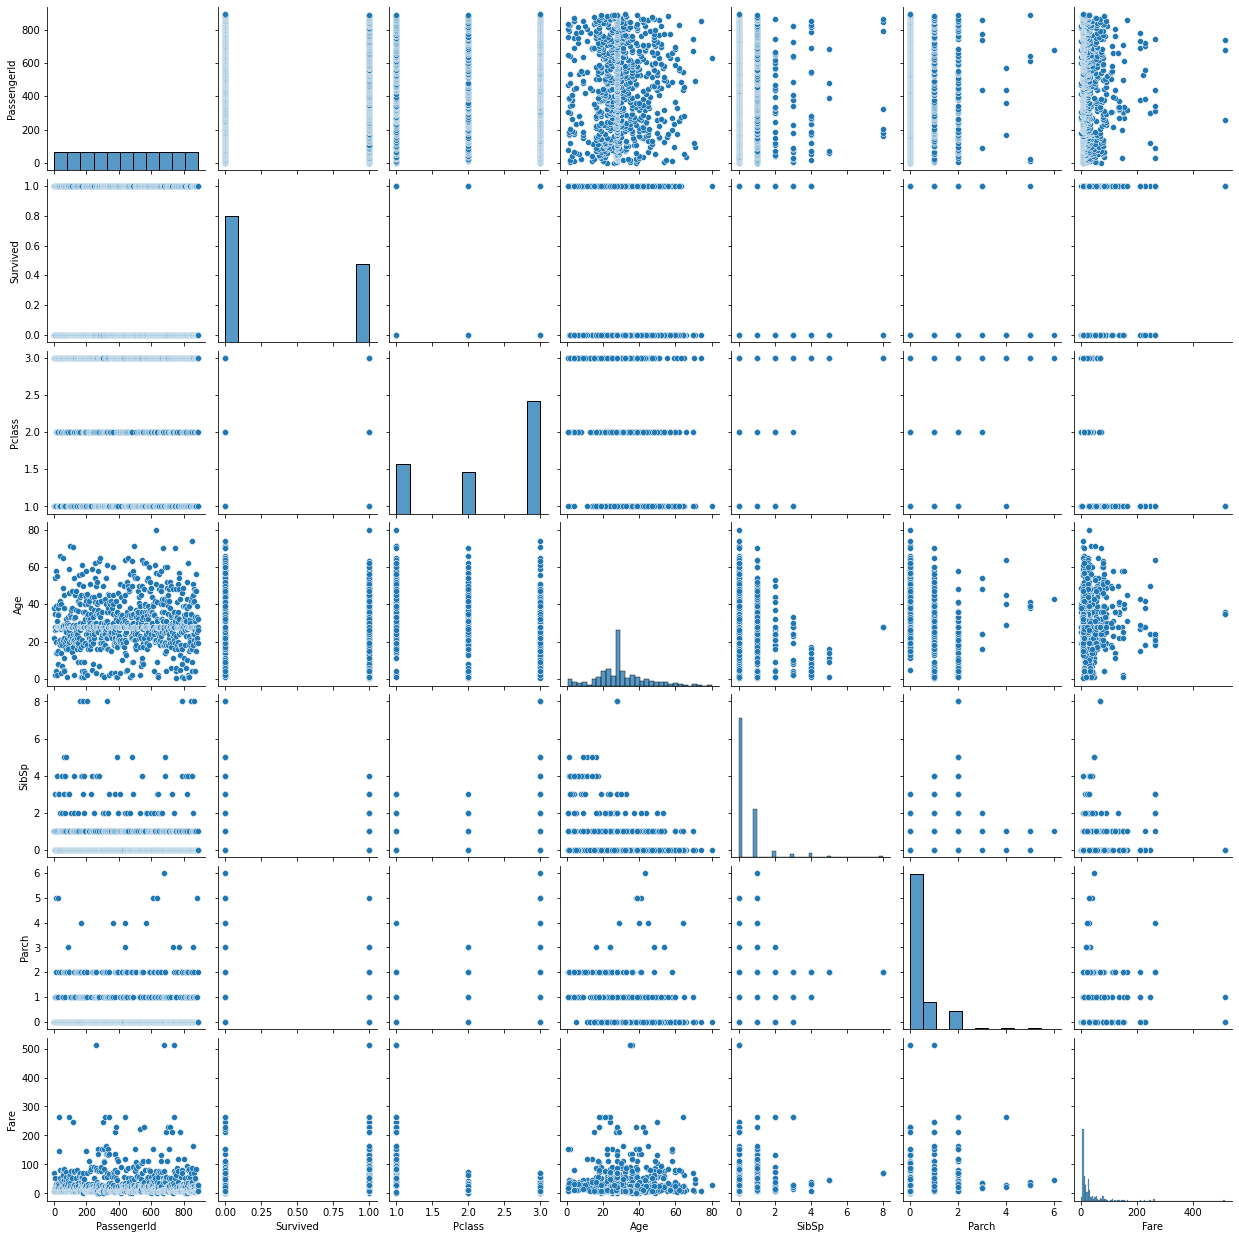

In [ ]:
# Plotting a pairplot of all the numerical values
# Visualisation to asses correlation results above
plt.figure(figsize = (7, 5), dpi=100)
sns.pairplot(train_clean)
plt.show()

## Modeling 

In [ ]:
# PassengerId ,Name and Ticket number are unique values that do not influence chances of survival
train_final = train_clean.drop(['PassengerId','Name','Ticket'], axis = 1)
test_final =  test_clean.drop(['PassengerId','Name','Ticket'], axis = 1)

In [ ]:
# View changes made on train dataset
train_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# View changes made on test dataset
test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
# Before proceeding to setting up our models 
# We will convert categorical values to numerical values
final = train_final.replace(['male', 'female','S', 'C','Q'],[0, 1, 0, 1, 2])
final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## KNN 80-20 split

In [ ]:
# Next step is to split our data into independent and dependent variables
X = final.drop('Survived',axis=1)
y = final.Survived

In [ ]:
# We will split our data into 80% train , 20% test and then further split the dataframe into X train, y train, X test and y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1 )

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training our model 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on our test data
y_pred = classifier.predict(X_test)
# Evaluating our model 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[95 11]
 [31 42]]
Accuracy: 0.7653631284916201


n neighbor = 5 the accurracy score is 76.54%

In [ ]:
# We will use Grid search cv to find the optimal hyperparameters
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : range (1,51),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), grid_params,cv=10)
# Fit the model on our train set
grid_model =  grid.fit(X_train, y_train)
# Find the best score
print(grid_model.best_score_)
# get the hyperparameters with the best score
print(grid_model.best_params_)

0.8342723004694836
{'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}


In [ ]:
# Train our model with the identified hyperparameters
from sklearn.neighbors import KNeighborsClassifier
classifier_tuned = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 18, weights= 'uniform')
classifier_tuned.fit(X_train, y_train)
# Make predictions on our test data
y_pred_1 = classifier_tuned.predict(X_test)
# Evaluating our model 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(confusion_matrix(y_test, y_pred_1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

[[100   6]
 [ 32  41]]
Accuracy: 0.7877094972067039


After hyperparameter tuning our model score improved to 78.77%

## KNN 70-30 split

In [ ]:
# We will split our data into 70% train ,30% test 
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.30, random_state=1 )
# Feature Scaling
scaler.fit(X_train_1)
X_train_1 = scaler.transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)
# Training our model 
from sklearn.neighbors import KNeighborsClassifier
classifier_1 = KNeighborsClassifier(n_neighbors=5)
classifier_1.fit(X_train_1, y_train_1)
# Make predictions on our test data
pred_1= classifier_1.predict(X_test_1)
# Evaluating our model 
print(confusion_matrix(y_test_1, pred_1))
print("Accuracy:",metrics.accuracy_score(y_test_1, pred_1))

[[137  16]
 [ 43  72]]
Accuracy: 0.7798507462686567


n neighbor = 5 the accuracy score is 77.98%

In [ ]:
# We will use Grid search cv to find the optimal hyperparameters
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : range (1,51),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_1 = GridSearchCV(KNeighborsClassifier(), grid_params,cv=10)
# Fit the model on our train set
grid_model_1 =  grid_1.fit(X_train_1, y_train_1)
# Find the best score
print(grid_model_1.best_score_)
# get the hyperparameters with the best score
print(grid_model_1.best_params_)

0.8443164362519202
{'metric': 'minkowski', 'n_neighbors': 18, 'weights': 'uniform'}


In [ ]:
# Train our model with the identified hyperparameters
classifier_tuned_1 = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 18, weights= 'uniform')
classifier_tuned_1.fit(X_train_1, y_train_1)
# Make predictions on our test data
y_pred_30 = classifier_tuned_1.predict(X_test_1)
# Evaluating our model 
print(confusion_matrix(y_test_1, y_pred_30))
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_30))

[[140  13]
 [ 46  69]]
Accuracy: 0.7798507462686567


The model did not improve even after hyperparameter tuning

## KNN 60-40 split

In [ ]:
# We will split our data into 60% train 40% test 
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.40, random_state=1 )
# Feature Scaling
scaler.fit(X_train_2)
X_train_2 = scaler.transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)
# Training our model 
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors=5)
classifier_2.fit(X_train_2, y_train_2)
# Make predictions on our test data
pred_2= classifier_2.predict(X_test_2)
# Evaluating our model 
print(confusion_matrix(y_test_2, pred_2))
print("Accuracy:",metrics.accuracy_score(y_test_2, pred_2))

[[183  24]
 [ 53  97]]
Accuracy: 0.7843137254901961


n neighbor = 5 the accuracy score is 78.43%

In [ ]:
# We will use Grid search cv to find the optimal hyperparameters
grid_params = { 'n_neighbors' : range (1,51),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_2 = GridSearchCV(KNeighborsClassifier(), grid_params,cv=10)
# Fit the model on our train set
grid_model_2 =  grid_2.fit(X_train_2, y_train_2)
# Find the best score
print(grid_model_2.best_score_)
# get the hyperparameters with the best score
print(grid_model_2.best_params_)

0.8389238294898671
{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'}


In [ ]:
# Train our model with the identified hyperparameters
classifier_tuned_2 = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 6, weights= 'uniform')
classifier_tuned_2.fit(X_train_2, y_train_2)
# Make predictions on our test data
y_pred_40 = classifier_tuned_2.predict(X_test_2)
# Evaluating our model 
print(confusion_matrix(y_test_2, y_pred_40))
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_40))

[[190  17]
 [ 57  93]]
Accuracy: 0.7927170868347339


After hyperparameter tuning our model score improved to 79.27%

the test size of 0.40 performed better than 0.30 and 0.20

## Challenge the solution

In [ ]:
# We will assess our accuracy when we use the Random Forest instead of KNN
# Import the relevant library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Train using 80% of the data.
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.2, random_state=1)
# Create a Random Forest classifier
forest = RandomForestClassifier()

In [ ]:
# Train the Random Forest model 
forest.fit(X_train_forest, y_train_forest)
# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test_forest)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_forest, y_pred_forest))

Accuracy: 0.7932960893854749


The random forest accuracy score is 79.32%

## Conclusion
Most Survivors:


*   were from first class
*   were female
*   were of the age of 28.0, 24.0, 36.0, 37.0 and 27.0
*   travelled without family
*   embarked from the port of Southampton

Model optimization techniques used in this model are : Change of metric distance through hyperparameter tuning and rescaling our data.

In terms of model performance:

80-20 split:


*   n neighbor = 5 the accurracy score is 76.54%
*   After hyperparameter tuning the accuracy score is 78.77%

70-30 split:

*   n neighbor = 5 the accurracy score is 77.98%
*   After hyperparameter tuning the accuracy score is 77.98%


60-40 split:

*   n neighbor = 5 the accurracy score is 78.43%
*   After hyperparameter tuning the accuracy score is 79.27%






## Recommendation


Although our model did not manage to meet our set level of accuracy of 90%, I 
would recommend using kNN algorithm at a test size of 0.40, metric = minkowski, n_neighbors= 6, weights= uniform and  an accuracy level of approximately 79% because it was the model that performed the best out of the three that we ran. 

Also the Random forest algorithm works well at an accuracy level of approximately 79%